# Исследование сервиса аренды самокатов GoFast 

В аналитику популярного сервиса аренды самокатов GoFast передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

**без подписки**
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;

**с подпиской Ultra**
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

План проекта:

1. Загрузка данных

2. Предобработка данных

3. Исследовательский анализ данных

4. Объединение данных 

5. Подсчет выручки

6. Проверка гипотез

7. Распределение 

8. Общий вывод

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt 

#### Шаг 1. Загрузка данных

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscr = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv("C:/Users/chern/users_go.csv")
    rides = pd.read_csv("C:/Users/chern/rides_go.csv")
    subscr = pd.read_csv("C:/Users/chern/subscriptions_go.csv")

In [3]:
# выведем первые строки всех трех датафреймов 
users.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице 1565 строк, тип данных integer и object. Изменение типов данных не требуется.

In [5]:
rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В таблице 18068 строк, тип данных integer, object и float. Замена float на integer в столбцах distance и duration не требуется, так как данные в них выражены непрерывными величинами. В столбце date следует изменить тип данных с object на datetime.

In [7]:
subscr.head(20)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В таблице всего 2 строки по имеющимся типам подписки. Типы данных object и integer присвоены верно.

#### Вывод:

Ознакомившись с датафреймами, видим, что есть следующие совокупные данные для анализа: 

**user_id** - уникальный номер пользователя;
**name** - имя пользователя;
**age** - возраст пользователя;
**city** - город использования услуг сервиса;
**subscription_type** - тип подписки (либо free, либо ultra);
**distance** - расстояние одной поездки в метрах;
**duration** - продолжительность одной поездки в минутах;
**date** - дата совершения поездки;
**minute_price** - стоимость одной минуты поездки;
**start_ride_price** - стоимость старта (начала поездки).

В таблицах представлены типы данных object, integer и float. Изменения требуются только в столбце date датафрейма users: следует изменить тип данных с object на datetime. Остальные типы значений присвоены верно. 

#### Шаг 2. Предобработка данных

In [9]:
# Приведем столбец date к типу даты pandas и создадим новый столбец с номером месяца 
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['month'] = rides['date'].dt.month

In [10]:
rides['year'] = rides['date'].dt.year
rides['year'].unique()

array([2021])

In [11]:
# проверим датафрейм users на наличие пропусков
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
# проверим столбец city на наличие неявных дубликатов 
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [13]:
# проверим датафрейм на явные дубликаты 
users.duplicated().sum()

31

In [14]:
# удалим явные дубликаты
users = users.drop_duplicates()

In [15]:
# проверим датафрейм rides на пропуски
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
year        0
dtype: int64

In [16]:
# проверим на наличие явных дубликатов
rides.duplicated().sum()

0

In [17]:
# проверим датафрейм subscr на наличие пропусков
subscr.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [18]:
# проверим на явные дубликаты
subscr.duplicated().sum()

0

#### Вывод:

Проверили все датафреймы на наличие дубликатов (явных и неявных) и пропусков.
В rides и subscr проблем не обнаружилось.
В users удалили явные дубликаты и изменили формат столбца city на datetime64.

#### Шаг 3. Исследовательский анализ данных

In [19]:
# исследуем столбец city и построим график
users['city'].describe()

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

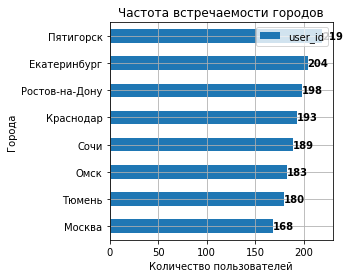

In [20]:
users_city = users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id')

ax = users_city.plot(kind='barh', grid=True, figsize=(4, 4)) 
 
for i, city in enumerate(users_city.index):
    value=users_city.loc[city, 'user_id']
    ax.text(value, i, str(value), color="black", va="center", ha="left", fontweight="bold")
    
plt.title('Частота встречаемости городов' )
plt.ylabel('Города')
plt.xlabel('Количество пользователей') 

plt.show()

В выборке представлены данные о работе приложения в 8 городах России. Разница в количистве пользователей не велика и в основном укладывается в промежуток из 50 пользователей. Наиболее популярно приложение в городе Пятигорск, а наименее - в Москве.

In [21]:
# исследуем тип подписки и построим график
subscr_t = users.groupby('subscription_type')['user_id'].count()
subscr_t

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64

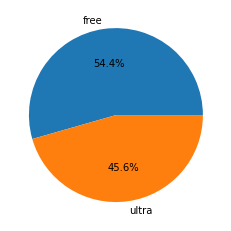

In [22]:
fig, ax = plt.subplots()
labels = 'free', 'ultra'
ax.pie(subscr_t, labels=labels, autopct='%1.1f%%')
title='Соотношение пользователей с подпиской и без подписки'
radius=1

plt.show()

Разница между пользователями с подпиской и без составляет всего 8,8% в пользу первых. Такая небольшая разница позволит корректно сравнивать две группы пользователей и проверять гипотезы. 

In [23]:
# исследуем возраст пользователей
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

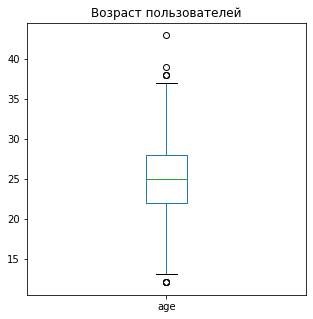

In [24]:
users.plot(y='age', kind='box', title='Возраст пользователей', figsize=(5, 5)); 

Медианный возраст пользователей равен 25 годам, а наибольшая часть пользователей расположилась в отрезке от примерно 22 до 27 лет. Очень редко сервисом пользуются в возрасте младше 13 и старше 37 лет. 

In [25]:
# исследуем расстояния поездок 
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

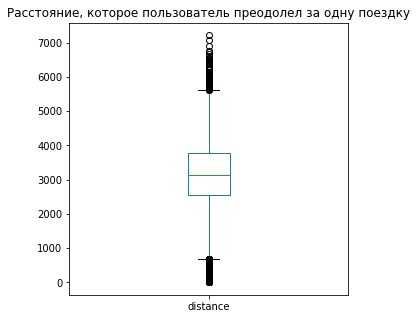

In [26]:
rides.plot(y='distance', kind='box', title='Расстояние, которое пользователь преодолел за одну поездку', figsize=(5, 5)); 

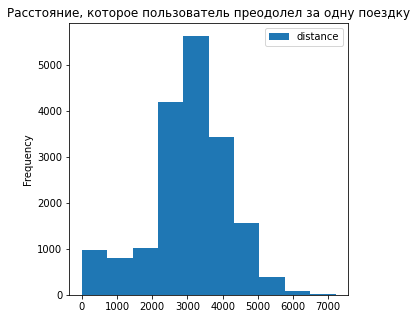

In [27]:
rides.plot(y='distance', kind='hist', title='Расстояние, которое пользователь преодолел за одну поездку', figsize=(5, 5)); 

Медианное значение расстояния поездки равно около 3,1 км, при этом большая часть поездок совершаются на дистанции от 2,5 до 3,9 км. Данные содержат большое количество выбросов единичных значений в промежутке до 900 м и более 5,6 км. На гистограмме видны аномальные значения около 0 м. и до 800-900 м.  

In [28]:
# исследуем продолжительность поездок 
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

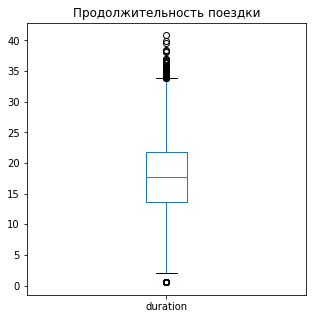

In [29]:
rides.plot(y='duration', kind='box', title='Продолжительность поездки', figsize=(5, 5)); 

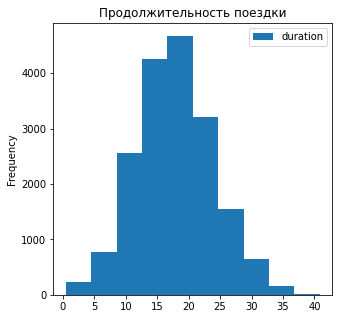

In [30]:
rides.plot(y='duration', kind='hist', title='Продолжительность поездки', figsize=(5, 5)); 

In [31]:
rides_short = rides.query('duration < 5')
rides_short_v = (rides_short['distance'] / rides_short['duration']).mean()
(rides_short_v * 60 / 1000).round(2)

213.83

In [32]:
rides_mean = rides.query('15 < duration < 20')
rides_mean_v = (rides_mean['distance'] / rides_mean['duration']).mean()
(rides_mean_v * 60 / 1000).round(2)

10.73

Медианное значение продолжительности поездки составляет около 17,5 мин, при этом большая часть поездок завершается в течение  13-22 мин. Данные содержат большое количество выбросов единичных значений в верхнем промежутке более 33 мин. и небольшое количество выбросов около 0 мин., когда либо произошел технический сбой, либо поездка не была совершена. 
Рассмотрели скорость передвижения для аномально быстрых поездок до 5 мин, она составила в среднем 213,83 км.ч. Электросамокат технически не может развить такую скорость, это подтверждает ошибку в данных. Для сравнения рассчитали среднюю скорость для прогулок с медианной продолжительностью - 15-20 мин. Скорость оказалась небольшой - 10,73 км в час, на такой скорости скорее всего самокат используется для прогулок, вероятно, с остановками.

#### Вывод:

Анализ данных показал, что чаще всего клиентами приложения становятся пользователи без подписки, использующие приложение в г. Пятигорск, в возрасте 25 лет. Наиболее популярными оказались поездки на 3,1 км и по 17,5 мин. 

#### Шаг 4. Объединение данных

In [33]:
# соберем 3 датафрейма в один датафрейм data 
data = users.merge(rides, on='user_id', how='outer').merge(subscr, on='subscription_type', how='outer') 

In [34]:
pd.set_option('display.max_columns', None)
data.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,2021,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,2021,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,2021,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,2021,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,2021,6,0,199


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   year               18068 non-null  int64         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

In [36]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
year                 0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [37]:
data.duplicated().sum()

0

Создали общий датафрейм Data. Проверили новую таблицу на корректность данных. Количество строк совпадает с таблицей users, типы значений указаны верно, дубликаты и пропуски не обнаружены.

In [38]:
# выделим в отдельные датафрейм данные по пользователям с подпиской и без, и сравним полученные данные
is_subscr = data.query('subscription_type == "ultra"')
len(is_subscr)

6500

In [39]:
no_subscr = data.query('subscription_type == "free"')
len(no_subscr)

11568

In [40]:
is_subscr['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [41]:
no_subscr['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

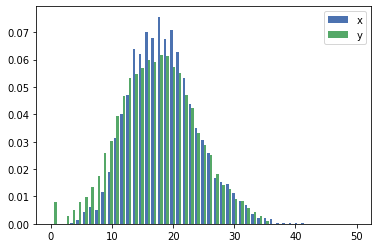

In [42]:
plt.style.use('seaborn-deep')

x = is_subscr['duration']
y = no_subscr['duration']
bins = np.linspace(0, 50, 50)

plt.hist([x, y], bins, label=['x', 'y'], density=True)
plt.legend(loc='upper right')
plt.show()

In [43]:
is_subscr['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [44]:
no_subscr['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

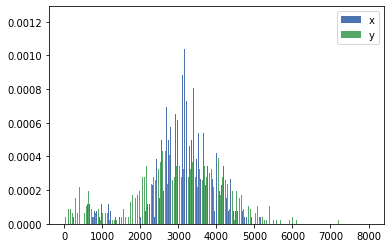

In [45]:
plt.style.use('seaborn-deep')

x = is_subscr['distance']
y = no_subscr['distance']
bins = np.linspace(0, 8000, 2000)

plt.hist([x, y], bins, label=['x', 'y'], density=True)
plt.legend(loc='upper right')
plt.show()

#### Вывод:

В среднем пользователь с подпиской преодолевает 3,1 км, а средняя продолжительность поездки составляет около 18,5 мин.
Для пользователя без подписки такое расстояние равно 3 км, а время - 17 мин. Пользователи с подпиской в среднем катаются немного дольше и дальше, чем пользователи без подписки.  На графиках видно, что пользователи с подпиской (х), преобладают на пользователями без подписки (y) и по продолжительности поездки и по расстоянию. 

#### Шаг 5. Подсчёт выручки

In [46]:
# создадим сводную таблицу с разбивкой данных по пользователям и месяцам
data['duration'] = np.ceil(data['duration']) 

data_monthly = (
    data.pivot_table(index=['user_id', 'month'], 
                     values=['subscription_type', 'distance', 'duration', 'start_ride_price', 'minute_price', 'subscription_fee'], 
                     aggfunc=({'subscription_type': 'first', 'distance': {'count', 'sum'}, 'duration': 'sum', 'minute_price': 'mean', 'start_ride_price': 'mean', 
                                'subscription_fee': 'mean'}))
)
data_monthly.columns = ['count', 'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type']

data_monthly.head(20)

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
        12         2   6751.629942      28.0             6                 0   
2       3          3  10187.723006      63.0             6                 0   
        4          2   6164.381824      40.0             6                 0   
        6          1   3255.338202      14.0             6                 0   
        7          2   6780.722964      48.0             6                 0   
        8          1    923.007439       7.0             6                 0   
        10         1   2824.636598      19.0             6                 0   
        12         1   3828.248580      12.0             6                 0   
3       1          1   3061.777147      13.0             6                 0   
        2          2   5421.152016      39.0             6                 0   
        4          1   2956.651632      21.0             6                 0   
        5          3   9064.026918      63.0             6                 0   
        7          3  10919.595403      67.0             6                 0   
        9          1   2891.012822      23.0             6                 0   
        12         1   2593.381928      13.0             6                 0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra  
        12                  199             ultra  
2       3                   199             ultra  
        4                   199             ultra  
        6                   199             ultra  
        7                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        12                  199             ultra  
3       1                   199             ultra  
        2                   199             ultra  
        4                   199             ultra  
        5                   199             ultra  
        7                   199             ultra  
        9                   199             ultra  
        12                  199             ultra

In [47]:
# добавим столбец с ежемесяччной прибылью по пользователям
data_monthly['profit'] = (
data_monthly['start_ride_price'] * data_monthly['count'] + data_monthly['minute_price'] 
* data_monthly['duration'] + data_monthly['subscription_fee'])

In [48]:
# посмотрим общую прибыль за каждый месяц
data_monthly.groupby('month')['profit'].sum()

month
1     337958.0
2     290428.0
3     329822.0
4     322916.0
5     337265.0
6     335978.0
7     328504.0
8     325650.0
9     323037.0
10    315360.0
11    305622.0
12    326101.0
Name: profit, dtype: float64

#### Вывод:

Из полученных данных видно, что по отдельно взятому пользователю траты на поездки через приложение могут отличаться в разы в зависимости от месяца. 
Общая прибыль приложения в зависимости от месяца также немного вариативна.
Самым прибыльным стал январь, когда приложение заработало 337 958,00 рублей. А меньше всего принес февраль с прибылью - 290 428,00 рублей. 

#### Шаг 6. Проверка гипотез

Проверим несколько утверждений продакт-менеджеров сервиса:

1) Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

2) Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

3) Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

4) После обновления серверов количество обращений в техподдержку значимо снизилось.

Сформулируем гипотезу по первому утверждению и проверим ее:

Н0 = время поездки для пользователей с подпиской и без совпадает

Н1 = время поездки пользователей с подпиской больше, чем пользователей без подписки. Соответственно, пользователи с подпиской приносят больше прибыли 

In [49]:
sample1 = is_subscr['duration']
(f'среднее время поездки пользователей с подпиской: {np.mean(sample1)}')

'среднее время поездки пользователей с подпиской: 18.54198516280583'

In [50]:
sample2 = no_subscr['duration']
(f'среднее время поездки пользователей без подписки: {np.mean(sample2)}')

'среднее время поездки пользователей без подписки: 17.39090929866399'

In [51]:
alpha = 0.05

results = st.ttest_ind(
    sample1,
    sample2,
    alternative='greater')

'p-значение:', results.pvalue 

('p-значение:', 1.2804098316645618e-34)

In [52]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, т.к. есть основания утверждать, что пользователи с подпиской, действительно, в среднем катаются дольше и, как результат, приносят приложению большую прибыль, чем пользователи без подписки')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу, т.к. есть основания утверждать, что пользователи с подпиской, действительно, в среднем катаются дольше и, как результат, приносят приложению большую прибыль, чем пользователи без подписки


Сформулируем гипотезу по второму утверждению и проверим ее:

Н0 = пользователи с подпиской за одну поездку проезжают 3130 м. Расстояние одной поездки являеется оптимальным с точки зрения износа самоката

Н1 = пользователи с подпиской за одну поездку проезжают больше 3130 м. Расстояние одной поездки превышает оптимальное с точки зрения износа самоката 

In [53]:
sample3 = is_subscr['distance']
(f'среднее расстояние поездки пользователей с подпиской: {np.mean(sample3)}')

'среднее расстояние поездки пользователей с подпиской: 3115.4453880370247'

In [54]:
value = 3130

alpha = 0.05

results2 = st.ttest_1samp(
           sample3, value,
           alternative='greater')

'p-значение:', results2.pvalue

('p-значение:', 0.9195368847849785)

In [55]:
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, т.к. есть основания утверждать, что расстояние одной поездки пользователя с подпиской не являеется оптимальным с точки зрения износа самоката')
else:
    print('Не получилось отвергнуть нулевую гипотезу, т.к. есть основания утверждать, что расстояние одной поездки пользователя с подпиской являеется оптимальным с точки зрения износа самоката')

Не получилось отвергнуть нулевую гипотезу, т.к. есть основания утверждать, что расстояние одной поездки пользователя с подпиской являеется оптимальным с точки зрения износа самоката


Сформулируем гипотезу по третьему утверждению и проверим ее:

Н0 = помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки 

Н1 = выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Подписка приносит больший доход.

In [56]:
alpha = 0.05

results3 = st.ttest_ind(data_monthly[data_monthly['subscription_type'] == "ultra"]['profit'],
                        data_monthly[data_monthly['subscription_type'] == "free"]['profit'],
                        alternative='greater')

'p-значение:', results3.pvalue 

('p-значение:', 1.8850394384715216e-31)

In [57]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, т.к. есть основания утверждать, что выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Подписка приносит больший доход.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, маловероятно, что подписка приносит больший доход')

Отвергаем нулевую гипотезу, т.к. есть основания утверждать, что выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Подписка приносит больший доход.


Если бы мы подтверждали гипотезу по четвертому утверждению:

Н0 = количество обращений в тех поддержку после обновления сервера равно количеству обращений до

Н1 = после обновления сервера количество обращений в тех поддержку снизилось

То мы бы использовали двухвыборочный t-тест для зависимых выборок - st.ttest_rel() 

#### Вывод:

Результаты проверки гипотез показали, что все предположения менеджеров скорее всего верны.

#### Шаг 7. Распределения

In [58]:
# задача 1
from math import sqrt
from scipy.stats import binom, norm

n = 1000
p = 0.1
k = 99
cdf = 0.05

while cdf <= binom.cdf(k, n, p):
    n += 1

n

1161

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


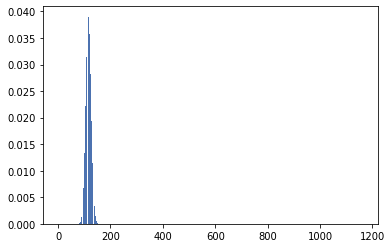

In [59]:
distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr);

#### Вывод:

Чтобы вероятность не выполнить план была около 5%, необходимо разослать 1161 промокод

In [60]:
# задача 2
n = 1000000
p = 0.4

mu = n * p 
sigma = sqrt(n * p * (1 - p))

distr3 = st.norm(mu, sigma)
    
result = distr3.cdf(399500)
result

0.15371708296369768

#### Вывод:

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна 15,37%

#### Общий вывод

Для исследования были переданы данные сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. 

Цель исследования - проанализировать предоставленные данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Ознакомившись с таблицами пришли к следующим выводам:

- В выборке данных представлены данные о работе приложения GoFast в 8 городах России. Разница в количистве пользователей не велика и в основном укладывается в промежуток из 50 пользователей. Наиболее популярно приложение в городе Пятигорск, а наименее - в Москве.

- Разница между пользователями с подпиской и без составляет всего 8,8% в пользу первых. Такая небольшая разница позволит корректно сравнивать две группы пользователей и проверять гипотезы. 

- Медианный возраст пользователей равен 25 годам, а наибольшая часть пользователей расположилась в отрезке от примерно 22 до 27 лет. Очень редко сервисом пользуются в возрасте младше 13 и старше 37 лет. 

- Медианное значение расстояния поездки равно около 3,1 км, при этом большая часть поездок совершается на дистанции от 2,5 до 3,9 км. Данные содержат большое количество выбросов единичных значений в промежутке до 900 м и более 5,6 км. 

Рассмотрели скорость передвижения для аномально быстрых поездок до 5 мин, она составила в среднем 213,83 км.ч. Электросамокат технически не может развить такую скорость, это подтверждает ошибку в данных. Для сравнения расчитали среднюю скорость для прогулок с медианной продолжительностью - 15-20 мин. Скорость оказалась небольшой - 10,73 км в час, на такой скорости скорее всего самокат используется для прогулок, вероятно, с остановками.

- Медианное значение продолжительности поездки составляет около 17,5 мин, при этом большая часть поездок завершается в течение  13-22 мин. Данные содержат большое количество выбросов единичных значений в верхнем промежутке более 33 мин. и небольшое количество выбросов около 0 мин., когда либо произошел технический сбой, либо поездка не была совершена.  

Таким образом, анализ данных показал, что чаще всего клиентами приложения становятся пользователи без подписки, использующие приложение в г. Пятигорск, в возрасте 25 лет. Наиболее популярными оказались поездки на 3,1 км и по 17,5 мин.

Далее, возник вопрос: есть ли разница в характеристиках поездки пользователя с подпиской и без поддписки?
Чтобы ответить на данный вопрос сравнили продолжительность и расстояние поездок данных категорий пользователей и пришли к следующему выводу: в среднем пользователь с подпиской преодолевает 3,1 км, а средняя продолжительность поездки составляет около 18,5 мин. Для пользователя без подписки такое расстояние равно 3 км, а время - 17 мин. Пользователи с подпиской в среднем катаются немного дольше и дальше, чем пользователи без подписки. 


Исследовали размер выручки по пользователям и месяцам.  Обнаружили, что по отдельно взятому пользователю траты на поездки через приложение могут отличаться в разы в зависимости от месяца. Общая прибыль приложения в зависимости от месяца также немного вариативна. Самым прибыльным стал январь, когда приложение заработало 337 958,00 рублей. А меньше всего принес февраль с прибылью - 290 428,00 рублей. 


Проверили несколько утверждений продакт-менеджеров сервиса:

1) Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

2) Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

3) Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.


Сформулировали гипотезу по первому утверждению и проверли ее:
Н0 = время поездки для пользователей с подпиской и без совпадает.
Н1 = время поездки пользователей с подпиской больше, чем пользователей без подписки. Соответственно, пользователи с подпиской приносят больше прибыли.

Отвергли нулевую гипотезу, т.к. есть основания утверждать, что пользователи с подпиской, действительно, в среднем катаются дольше и как результат приносят приложению большую прибыль, чем пользователи без подписки.



Сформулировали гипотезу по второму утверждению и проверили ее:
Н0 = пользователи с подпиской за одну поездку проезжают 3130 м. Расстояние одной поездки являеется оптимальным с точки зрения износа самоката.
Н1 = пользователи с подпиской за одну поездку проезжают больше 3130 м. Расстояние одной поездки превышает оптимальное с точки зрения износа самоката.

Не получилось отвергнуть нулевую гипотезу, т.к. есть основания утверждать, что расстояние одной поездки пользователя с подпиской являеется оптимальным с точки зрения износа самоката.



Сформулировали гипотезу по третьему утверждению и проверили ее:
Н0 = помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.
Н1 = выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Подписка приносит больший доход.

Отвергаем нулевую гипотезу, т.к. есть основания утверждать, что выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Подписка приносит больший доход.

Таким образом, все предположения менеджеров скорее всего верны.